# $$Perceptron~ Multi-Camadas (MLP):$$

## $$Conceito:$$




As Redes Neurais Artificiais (RNA) são modelos matemáticos para análise de dados inspirados nas estruturas neuronais do cérebro. 



-----------------------------------------------------------------------------------------------------------------------



O MLP é um algoritmo de redes neurais artificiais que agrupa os neurônios em camadas, onde, cada neurônio de cada camada é conectado a todos os neurônios da camada seguinte. O que permite que um sinal de entrada seja propagado até a última camada (a camada de saída). Após a rede gerar uma saída, ela é comparada com a saída desejada (Isso porque o MLP é um algoritmo de RNA supervisionado) e, assim, é calculado o erro que se refere a diferença entre a saída obtida e a desejada. Após calculado o erro, ele deve ser retropropagado, isto é, propagado da última camada até a primeira, de modo que, é determinada a influência de cada peso no erro calculado, para que cada peso seja ajustado para diminuir o erro em iterações (ou época) futuras.



-----------------------------------------------------------------------------------------------------------------------





## $$A ~inicialização ~dos~ pesos ~e~ biases:$$





A inicialização dos pesos e biases, pode contribuir para diminuir o número de iterações necessárias para se atingir saídas próximas o suficiente das saídas desejadas. No entanto, dependendo da aplicação, principalmente em problemas não linearmente separáveis, torna-se muito difícil se determinar os pesos e biases iniciais ideais. Então, geralmente se recorre a técnicas como, por exemplo, sortear valores em torno de zero, conforme um raio como limiar.



-----------------------------------------------------------------------------------------------------------------------



## $$O~potencial  ~de~ativação:$$ 



As entradas (X) podem ser os sinais submetidos a rede(Variáveis Explicativas) ou a saída de neurónios que são entradas de outros neurônios.



O bias (b) está associado aos neurônios, isto é, cada neurônio tem um bias e gera um potencial de ativação (u) que corresponde a soma ponderada das entradas pelos devidos pesos



-----------------------------------------------------------------------------------------------------------------------





## $$A~ função~ de~ ativação:$$ 





Uma função bastante utilizada para função de ativação em MLP onde se deseja uma classificação entre 0 e 1, é a sigmoide porque ela retorna valores entre 0 e 1, que representam uma saída y. Como a saída da função sigmoide está entre 0 e 1, ela já sai normalizada. Por isso, também, a utilidade da função nesse tipo de aplicação.



OBS: Nem sempre a função sigmoide é a mais adequada para ser usada como função de ativação. Existem outras como: Função linear, ReLU, Softmax, Tanh, Binary Step Function, etc.



-----------------------------------------------------------------------------------------------------------------------





## $$Erro ~total:$$ 





Antes de ajustar os pesos da rede, é necessário calcular o erro total que corresponde ao somatório do quadrado da diferença entre a saída desejada e a obtida.



-----------------------------------------------------------------------------------------------------------------------





## $$Atualização ~dos~ pesos ~e ~biases:$$ 



Para a atualização dos pesos, cada peso recebe o valor dele mesmo menos o produto da taxa de aprendizado pelo fator gradiente.É importante frizar que, para o ajuste dos pesos, deve-se utilizar um algoritmo conhecido como backpropagation



A atualização do bias é análoga a dos pesos, sendo que, é calculado um novo gradiente para o bias a ser atualizado.







A taxa de aprendizado é um fator de multiplicação que visa contribuir com a aproximação do valor do peso ao valor ideal para que ele, junto dos demais, possam aproximar as saídas obtidas das desejadas. Isso, porque a taxa de aprendizado é multiplicada pelo valor do gradiente que serve de direção para o ajuste dos pesos.



-----------------------------------------------------------------------------------------------------------------------







## $$Backpropagation:$$



Após o cálculo do erro, se pode retropropagá-lo da camada de saída até a camada de entrada, ajustando os pesos que conectam essas camadas. Uma consideração importante é que o ajuste dos pesos visa diminuir o erro total obtido.



-----------------------------------------------------------------------------------------------------------------------







## $$Ajuste~ dos~ pesos~ ligados~ a ~camada~ final:$$





Para o cálculo do gradiente, basta derivar as funções de que se deseje calcular o mínimo local. O gradiente é calculado por derivada parcial que corresponde a taxa de variação em relação ao parâmetro de entrada da função. Tal taxa de variação, quando aplicada a uma função que recebe o peso como uma das suas entradas, representa a culpa do mesmo no resultado da função. Para calcular a parcela de influência no erro total do peso que corresponde a taxa de variação entre o erro total basta calcular o gradiente.





__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$

## $$Encontrar ~o ~melhor~ modelo~ de~ rede~ neural~ usando~ o ~algoritimo~ MLP$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# Base de dados

In [2]:
from sklearn.neural_network import MLPClassifier

In [23]:
#Base de dados de credito
dados = pd.read_csv('credit_data.csv')
dados

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**Temos 32.581 observações e 12 variáveis**

# Análise Exploratória

In [4]:
#Verificar os tipos de colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Variáveis Númericas e Categóricas**

In [5]:
#Dados Nan

#Verificar dados NAN
nan = dados.isnull().values.sum()
print(f'Dados NaN = {nan}')

Dados NaN = 4011


**4011 dados NaN**

In [6]:
#Remover dados NaN
dados = pd.DataFrame(dados.dropna(axis=0, how='any'))
print(f'Dados NaN após transformação = {dados.isnull().values.sum()}')
print(f'Tamanho do dataset após transformação = {len(dados)}')
print(f'Shape do Dataframe: {dados.shape}')

Dados NaN após transformação = 0
Tamanho do dataset após transformação = 28638
Shape do Dataframe: (28638, 12)


**Removido dados NaN**

In [7]:
#Selecionar apenas variaveis numericas
dados_x = dados[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income',
      'cb_person_cred_hist_length']]

#Selecionar a variavel target
dados_y = dados['loan_status'] 

print(f'Shape do Dataframe: {dados_x.shape}')

Shape do Dataframe: (28638, 7)


**Selecionamos apenas variáveis numéricas para criar o modelo, para poder usar as variáveis categóricas precisaria tratar os dados, pois o algoritmo MLP só modela dados no formato numérico**

In [8]:
# Coloca todos os dados na mesma escala
col = dados_x.columns
dados_scale = pd.DataFrame(scale(dados_x),columns=col)
dados_scale.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-0.907594,-0.122674,28.453433,4.003984,1.542164,3.952527,-0.691791
1,-1.066064,-0.914907,0.050866,-1.367627,0.031008,-0.653141,-0.939413
2,-0.432183,-0.914907,-0.911932,-0.656678,0.566725,3.764540,-0.691791
3,-0.749123,-0.018433,-0.189833,4.003984,1.297530,3.388567,-0.939413
4,-0.590653,-0.196445,0.772966,4.003984,1.000253,3.576554,-0.444169


**Padronizamos os dados para que todas as variáveis fiquem na mesma escala**

# Separar os dados em treino e teste

In [9]:
#Separar os dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dados_scale,dados_y,test_size=0.3,random_state=1)

# Modelagem - Rede Neural Multilayer Perceptron

In [10]:
#Modelo 1 - adam
rede_neural_credit1 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit1.fit(X_train, y_train)

Iteration 1, loss = 0.48445729
Iteration 2, loss = 0.39796614
Iteration 3, loss = 0.37607683
Iteration 4, loss = 0.36908594
Iteration 5, loss = 0.36559495
Iteration 6, loss = 0.36332078
Iteration 7, loss = 0.36154255
Iteration 8, loss = 0.36025661
Iteration 9, loss = 0.35898204
Iteration 10, loss = 0.35839159
Iteration 11, loss = 0.35802629
Iteration 12, loss = 0.35756053
Iteration 13, loss = 0.35628707
Iteration 14, loss = 0.35603388
Iteration 15, loss = 0.35535238
Iteration 16, loss = 0.35471691
Iteration 17, loss = 0.35420211
Iteration 18, loss = 0.35383426
Iteration 19, loss = 0.35333465
Iteration 20, loss = 0.35302815
Iteration 21, loss = 0.35264981
Iteration 22, loss = 0.35237792
Iteration 23, loss = 0.35202232
Iteration 24, loss = 0.35164435
Iteration 25, loss = 0.35104881
Iteration 26, loss = 0.35135596
Iteration 27, loss = 0.35028813
Iteration 28, loss = 0.35029616
Iteration 29, loss = 0.34985946
Iteration 30, loss = 0.34964196
Iteration 31, loss = 0.34947899
Iteration 32, los

Iteration 254, loss = 0.32533351
Iteration 255, loss = 0.32482809
Iteration 256, loss = 0.32498724
Iteration 257, loss = 0.32508995
Iteration 258, loss = 0.32481209
Iteration 259, loss = 0.32496280
Iteration 260, loss = 0.32543462
Iteration 261, loss = 0.32498697
Iteration 262, loss = 0.32518638
Iteration 263, loss = 0.32456723
Iteration 264, loss = 0.32449218
Iteration 265, loss = 0.32505696
Iteration 266, loss = 0.32489216
Iteration 267, loss = 0.32477177
Iteration 268, loss = 0.32476664
Iteration 269, loss = 0.32500751
Iteration 270, loss = 0.32468927
Iteration 271, loss = 0.32474685
Iteration 272, loss = 0.32444516
Iteration 273, loss = 0.32466905
Iteration 274, loss = 0.32456804
Iteration 275, loss = 0.32464940
Iteration 276, loss = 0.32428060
Iteration 277, loss = 0.32445748
Iteration 278, loss = 0.32433033
Iteration 279, loss = 0.32474373
Iteration 280, loss = 0.32444114
Iteration 281, loss = 0.32379283
Iteration 282, loss = 0.32382263
Iteration 283, loss = 0.32408805
Iteration 

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

**Modelo mais simples, serve como base para o aperfeiçoamento dos demais modelos**

In [11]:
#Modelo 2 - sgd
rede_neural_credit2 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'sgd', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit2.fit(X_train, y_train)

Iteration 1, loss = 0.58898450
Iteration 2, loss = 0.53769183
Iteration 3, loss = 0.50623723
Iteration 4, loss = 0.48341644
Iteration 5, loss = 0.46562315
Iteration 6, loss = 0.45129916
Iteration 7, loss = 0.43944886
Iteration 8, loss = 0.42968214
Iteration 9, loss = 0.42182859
Iteration 10, loss = 0.41558141
Iteration 11, loss = 0.41066073
Iteration 12, loss = 0.40672369
Iteration 13, loss = 0.40352368
Iteration 14, loss = 0.40095135
Iteration 15, loss = 0.39883556
Iteration 16, loss = 0.39704770
Iteration 17, loss = 0.39547287
Iteration 18, loss = 0.39406925
Iteration 19, loss = 0.39280511
Iteration 20, loss = 0.39166164
Iteration 21, loss = 0.39057975
Iteration 22, loss = 0.38960163
Iteration 23, loss = 0.38868610
Iteration 24, loss = 0.38781055
Iteration 25, loss = 0.38698121
Iteration 26, loss = 0.38621350
Iteration 27, loss = 0.38547719
Iteration 28, loss = 0.38474849
Iteration 29, loss = 0.38409217
Iteration 30, loss = 0.38344676
Iteration 31, loss = 0.38284441
Iteration 32, los

Iteration 255, loss = 0.35678198
Iteration 256, loss = 0.35675573
Iteration 257, loss = 0.35669119
Iteration 258, loss = 0.35667155
Iteration 259, loss = 0.35663028
Iteration 260, loss = 0.35661128
Iteration 261, loss = 0.35660518
Iteration 262, loss = 0.35657558
Iteration 263, loss = 0.35653589
Iteration 264, loss = 0.35655212
Iteration 265, loss = 0.35650111
Iteration 266, loss = 0.35645801
Iteration 267, loss = 0.35645242
Iteration 268, loss = 0.35640250
Iteration 269, loss = 0.35637545
Iteration 270, loss = 0.35636331
Iteration 271, loss = 0.35635647
Iteration 272, loss = 0.35628710
Iteration 273, loss = 0.35627732
Iteration 274, loss = 0.35624246
Iteration 275, loss = 0.35624879
Iteration 276, loss = 0.35620648
Iteration 277, loss = 0.35618785
Iteration 278, loss = 0.35615489
Iteration 279, loss = 0.35613133
Iteration 280, loss = 0.35609957
Iteration 281, loss = 0.35611508
Iteration 282, loss = 0.35604685
Iteration 283, loss = 0.35603897
Iteration 284, loss = 0.35599975
Iteration 

Iteration 504, loss = 0.35189904
Iteration 505, loss = 0.35189955
Iteration 506, loss = 0.35188032
Iteration 507, loss = 0.35188576
Iteration 508, loss = 0.35183718
Iteration 509, loss = 0.35185620
Iteration 510, loss = 0.35182356
Iteration 511, loss = 0.35182696
Iteration 512, loss = 0.35178534
Iteration 513, loss = 0.35182682
Iteration 514, loss = 0.35175333
Iteration 515, loss = 0.35172505
Iteration 516, loss = 0.35175730
Iteration 517, loss = 0.35172354
Iteration 518, loss = 0.35170084
Iteration 519, loss = 0.35169064
Iteration 520, loss = 0.35164703
Iteration 521, loss = 0.35160907
Iteration 522, loss = 0.35161731
Iteration 523, loss = 0.35160207
Iteration 524, loss = 0.35159820
Iteration 525, loss = 0.35160887
Iteration 526, loss = 0.35156542
Iteration 527, loss = 0.35153271
Iteration 528, loss = 0.35152286
Iteration 529, loss = 0.35149820
Iteration 530, loss = 0.35152617
Iteration 531, loss = 0.35153209
Iteration 532, loss = 0.35145427
Iteration 533, loss = 0.35145716
Iteration 

Iteration 756, loss = 0.34822509
Iteration 757, loss = 0.34819000
Iteration 758, loss = 0.34819896
Iteration 759, loss = 0.34821713
Iteration 760, loss = 0.34818626
Iteration 761, loss = 0.34815252
Iteration 762, loss = 0.34809888
Iteration 763, loss = 0.34809447
Iteration 764, loss = 0.34809457
Iteration 765, loss = 0.34809568
Iteration 766, loss = 0.34810290
Iteration 767, loss = 0.34804194
Iteration 768, loss = 0.34805319
Iteration 769, loss = 0.34803332
Iteration 770, loss = 0.34801492
Iteration 771, loss = 0.34802480
Iteration 772, loss = 0.34798737
Iteration 773, loss = 0.34801847
Iteration 774, loss = 0.34796814
Iteration 775, loss = 0.34795744
Iteration 776, loss = 0.34793828
Iteration 777, loss = 0.34791518
Iteration 778, loss = 0.34793204
Iteration 779, loss = 0.34799382
Iteration 780, loss = 0.34786622
Iteration 781, loss = 0.34788586
Iteration 782, loss = 0.34787860
Iteration 783, loss = 0.34782891
Iteration 784, loss = 0.34781897
Iteration 785, loss = 0.34783314
Iteration 

Iteration 1007, loss = 0.34451816
Iteration 1008, loss = 0.34449895
Iteration 1009, loss = 0.34447590
Iteration 1010, loss = 0.34444204
Iteration 1011, loss = 0.34446308
Iteration 1012, loss = 0.34436100
Iteration 1013, loss = 0.34439160
Iteration 1014, loss = 0.34448680
Iteration 1015, loss = 0.34434569
Iteration 1016, loss = 0.34427197
Iteration 1017, loss = 0.34431844
Iteration 1018, loss = 0.34427637
Iteration 1019, loss = 0.34425950
Iteration 1020, loss = 0.34428051
Iteration 1021, loss = 0.34425458
Iteration 1022, loss = 0.34429006
Iteration 1023, loss = 0.34430810
Iteration 1024, loss = 0.34418325
Iteration 1025, loss = 0.34418170
Iteration 1026, loss = 0.34415585
Iteration 1027, loss = 0.34417652
Iteration 1028, loss = 0.34412188
Iteration 1029, loss = 0.34409753
Iteration 1030, loss = 0.34410192
Iteration 1031, loss = 0.34410193
Iteration 1032, loss = 0.34404948
Iteration 1033, loss = 0.34405580
Iteration 1034, loss = 0.34400417
Iteration 1035, loss = 0.34418060
Iteration 1036

Iteration 1251, loss = 0.34067598
Iteration 1252, loss = 0.34080803
Iteration 1253, loss = 0.34076215
Iteration 1254, loss = 0.34062563
Iteration 1255, loss = 0.34062884
Iteration 1256, loss = 0.34070355
Iteration 1257, loss = 0.34066205
Iteration 1258, loss = 0.34060979
Iteration 1259, loss = 0.34068225
Iteration 1260, loss = 0.34057820
Iteration 1261, loss = 0.34055037
Iteration 1262, loss = 0.34049577
Iteration 1263, loss = 0.34060605
Iteration 1264, loss = 0.34051516
Iteration 1265, loss = 0.34051132
Iteration 1266, loss = 0.34051141
Iteration 1267, loss = 0.34041155
Iteration 1268, loss = 0.34043958
Iteration 1269, loss = 0.34038457
Iteration 1270, loss = 0.34045675
Iteration 1271, loss = 0.34042813
Iteration 1272, loss = 0.34047254
Iteration 1273, loss = 0.34037233
Iteration 1274, loss = 0.34032366
Iteration 1275, loss = 0.34033875
Iteration 1276, loss = 0.34031792
Iteration 1277, loss = 0.34032861
Iteration 1278, loss = 0.34025800
Iteration 1279, loss = 0.34021929
Iteration 1280

Iteration 1493, loss = 0.33616830
Iteration 1494, loss = 0.33611230
Iteration 1495, loss = 0.33612920
Iteration 1496, loss = 0.33601615
Iteration 1497, loss = 0.33612757
Iteration 1498, loss = 0.33607694
Iteration 1499, loss = 0.33619337
Iteration 1500, loss = 0.33605000


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, solver='sgd',
              tol=1e-05, verbose=True)

**Igual o modelo 1, porém com otimizador: sgd**

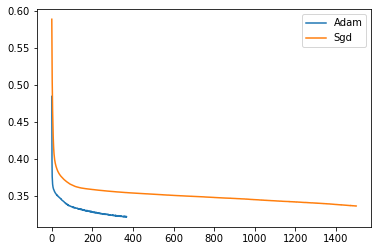

In [12]:
#Plot da função de custo dos modelos
plt.plot(rede_neural_credit1.loss_curve_,label='Adam')
plt.plot(rede_neural_credit2.loss_curve_,label='Sgd')
plt.legend(loc='upper right')

**Os 2 modelos conseguiram um desempenho bem próximos, porém o Otimizador "Adam" conseguiu chegar na menor função de custo com menos iterações quando comparado com o otimizador "sgd"**

In [13]:
#Modelo 3 - adam + Camadas
rede_neural_credit3 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (50,50,30,30))
rede_neural_credit3.fit(X_train, y_train)

Iteration 1, loss = 0.41234322
Iteration 2, loss = 0.36533008
Iteration 3, loss = 0.36015152
Iteration 4, loss = 0.35812220
Iteration 5, loss = 0.35492289
Iteration 6, loss = 0.35314504
Iteration 7, loss = 0.35046008
Iteration 8, loss = 0.34859033
Iteration 9, loss = 0.34767283
Iteration 10, loss = 0.34600412
Iteration 11, loss = 0.34517382
Iteration 12, loss = 0.34437772
Iteration 13, loss = 0.34275737
Iteration 14, loss = 0.34147646
Iteration 15, loss = 0.34214663
Iteration 16, loss = 0.34063898
Iteration 17, loss = 0.33979092
Iteration 18, loss = 0.33851030
Iteration 19, loss = 0.33778382
Iteration 20, loss = 0.33655080
Iteration 21, loss = 0.33615163
Iteration 22, loss = 0.33629164
Iteration 23, loss = 0.33452188
Iteration 24, loss = 0.33554073
Iteration 25, loss = 0.33286092
Iteration 26, loss = 0.33511308
Iteration 27, loss = 0.33217832
Iteration 28, loss = 0.33139642
Iteration 29, loss = 0.33045942
Iteration 30, loss = 0.33091331
Iteration 31, loss = 0.33062089
Iteration 32, los

Iteration 253, loss = 0.23778434
Iteration 254, loss = 0.24121176
Iteration 255, loss = 0.24003976
Iteration 256, loss = 0.23638707
Iteration 257, loss = 0.23773946
Iteration 258, loss = 0.23709534
Iteration 259, loss = 0.23786612
Iteration 260, loss = 0.23673135
Iteration 261, loss = 0.23585468
Iteration 262, loss = 0.23438102
Iteration 263, loss = 0.23671470
Iteration 264, loss = 0.23661474
Iteration 265, loss = 0.23397585
Iteration 266, loss = 0.23359301
Iteration 267, loss = 0.23717699
Iteration 268, loss = 0.23542830
Iteration 269, loss = 0.23279387
Iteration 270, loss = 0.23255997
Iteration 271, loss = 0.23253466
Iteration 272, loss = 0.23475329
Iteration 273, loss = 0.23296052
Iteration 274, loss = 0.23332787
Iteration 275, loss = 0.23634358
Iteration 276, loss = 0.23320838
Iteration 277, loss = 0.23225672
Iteration 278, loss = 0.23315759
Iteration 279, loss = 0.23097270
Iteration 280, loss = 0.23136316
Iteration 281, loss = 0.23394481
Iteration 282, loss = 0.23277827
Iteration 

MLPClassifier(hidden_layer_sizes=(50, 50, 30, 30), max_iter=1500, tol=1e-05,
              verbose=True)

**Adicionando mais neurônios e mais camadas ocultas**

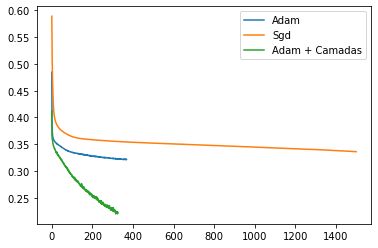

In [14]:
plt.plot(rede_neural_credit1.loss_curve_,label='Adam')
plt.plot(rede_neural_credit2.loss_curve_,label='Sgd')
plt.plot(rede_neural_credit3.loss_curve_,label='Adam + Camadas')
plt.legend(loc='upper right')

**Adicionando mais camadas e acrescentando mais neurônios a rede, percebemos a diminuição do erro**

In [15]:
#Modelo 4 - batch_size
rede_neural_credit4 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (50,50,30,30),batch_size=50)
rede_neural_credit4.fit(X_train, y_train)

Iteration 1, loss = 0.39767564
Iteration 2, loss = 0.36268778
Iteration 3, loss = 0.35725195
Iteration 4, loss = 0.35292111
Iteration 5, loss = 0.34952921
Iteration 6, loss = 0.34691135
Iteration 7, loss = 0.34470567
Iteration 8, loss = 0.34309370
Iteration 9, loss = 0.34257055
Iteration 10, loss = 0.34115223
Iteration 11, loss = 0.33975804
Iteration 12, loss = 0.33846905
Iteration 13, loss = 0.33709718
Iteration 14, loss = 0.33731609
Iteration 15, loss = 0.33466416
Iteration 16, loss = 0.33426156
Iteration 17, loss = 0.33339034
Iteration 18, loss = 0.33185367
Iteration 19, loss = 0.33243956
Iteration 20, loss = 0.33013359
Iteration 21, loss = 0.33034771
Iteration 22, loss = 0.32861510
Iteration 23, loss = 0.32827705
Iteration 24, loss = 0.32700673
Iteration 25, loss = 0.32534356
Iteration 26, loss = 0.32608670
Iteration 27, loss = 0.32497821
Iteration 28, loss = 0.32427155
Iteration 29, loss = 0.32311614
Iteration 30, loss = 0.32274326
Iteration 31, loss = 0.32110446
Iteration 32, los

Iteration 253, loss = 0.20128910
Iteration 254, loss = 0.20588643
Iteration 255, loss = 0.20674232
Iteration 256, loss = 0.20173693
Iteration 257, loss = 0.20830458
Iteration 258, loss = 0.19918188
Iteration 259, loss = 0.19956175
Iteration 260, loss = 0.19782891
Iteration 261, loss = 0.20282772
Iteration 262, loss = 0.20579078
Iteration 263, loss = 0.19927557
Iteration 264, loss = 0.20033611
Iteration 265, loss = 0.20020138
Iteration 266, loss = 0.19843806
Iteration 267, loss = 0.20065651
Iteration 268, loss = 0.20203938
Iteration 269, loss = 0.19982134
Iteration 270, loss = 0.20279205
Iteration 271, loss = 0.20026070
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPClassifier(batch_size=50, hidden_layer_sizes=(50, 50, 30, 30), max_iter=1500,
              tol=1e-05, verbose=True)

**Dividindo o treinamento em lotes de 50**

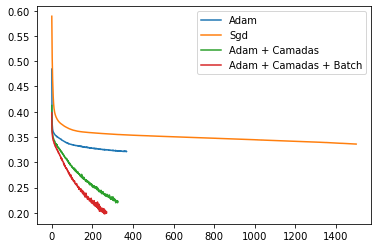

In [16]:
plt.plot(rede_neural_credit1.loss_curve_,label='Adam')
plt.plot(rede_neural_credit2.loss_curve_,label='Sgd')
plt.plot(rede_neural_credit3.loss_curve_,label='Adam + Camadas')
plt.plot(rede_neural_credit4.loss_curve_,label='Adam + Camadas + Batch')
plt.legend(loc='upper right')

**Apenas dividindo os dados em lotes, conseguimos um melhor resultado com menos iterações**

In [17]:
#Modelo 5
rede_neural_credit5 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',batch_size=50,
                                   hidden_layer_sizes = (100,100,50,50))
rede_neural_credit5.fit(X_train, y_train)

Iteration 1, loss = 0.38513561
Iteration 2, loss = 0.35947251
Iteration 3, loss = 0.35376462
Iteration 4, loss = 0.34982170
Iteration 5, loss = 0.34693647
Iteration 6, loss = 0.34515983
Iteration 7, loss = 0.34301632
Iteration 8, loss = 0.34259298
Iteration 9, loss = 0.34042441
Iteration 10, loss = 0.34010367
Iteration 11, loss = 0.33769298
Iteration 12, loss = 0.33756653
Iteration 13, loss = 0.33622156
Iteration 14, loss = 0.33510754
Iteration 15, loss = 0.33382617
Iteration 16, loss = 0.33377166
Iteration 17, loss = 0.33165273
Iteration 18, loss = 0.33021605
Iteration 19, loss = 0.32894381
Iteration 20, loss = 0.32856483
Iteration 21, loss = 0.32820629
Iteration 22, loss = 0.32612452
Iteration 23, loss = 0.32475629
Iteration 24, loss = 0.32436703
Iteration 25, loss = 0.32372146
Iteration 26, loss = 0.32077060
Iteration 27, loss = 0.31967087
Iteration 28, loss = 0.31836605
Iteration 29, loss = 0.31594478
Iteration 30, loss = 0.31537622
Iteration 31, loss = 0.31498334
Iteration 32, los

MLPClassifier(batch_size=50, hidden_layer_sizes=(100, 100, 50, 50),
              max_iter=1500, tol=1e-05, verbose=True)

**Adicionado mais neurônios**

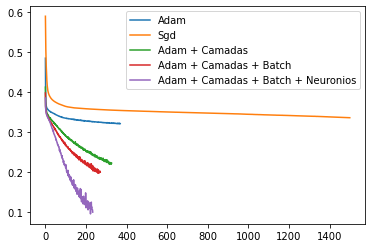

In [18]:
plt.plot(rede_neural_credit1.loss_curve_,label='Adam')
plt.plot(rede_neural_credit2.loss_curve_,label='Sgd')
plt.plot(rede_neural_credit3.loss_curve_,label='Adam + Camadas')
plt.plot(rede_neural_credit4.loss_curve_,label='Adam + Camadas + Batch')
plt.plot(rede_neural_credit5.loss_curve_,label='Adam + Camadas + Batch + Neuronios')


plt.legend(loc='upper right')

**Adicionando mais neurônios nas camadas intermediarias, reduzimos ainda mais o erro e o número de iterações**

In [19]:
#Modelo 6
rede_neural_credit6 = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',batch_size=50,
                                   hidden_layer_sizes = (200,200,100,100))
rede_neural_credit6.fit(X_train, y_train)

Iteration 1, loss = 0.38267585
Iteration 2, loss = 0.36043721
Iteration 3, loss = 0.35349410
Iteration 4, loss = 0.35059643
Iteration 5, loss = 0.34918178
Iteration 6, loss = 0.34556628
Iteration 7, loss = 0.34352451
Iteration 8, loss = 0.34289361
Iteration 9, loss = 0.34085821
Iteration 10, loss = 0.34036139
Iteration 11, loss = 0.33851023
Iteration 12, loss = 0.33733939
Iteration 13, loss = 0.33652376
Iteration 14, loss = 0.33317578
Iteration 15, loss = 0.33331732
Iteration 16, loss = 0.33098848
Iteration 17, loss = 0.32859520
Iteration 18, loss = 0.32760965
Iteration 19, loss = 0.32537005
Iteration 20, loss = 0.32433789
Iteration 21, loss = 0.32151870
Iteration 22, loss = 0.32066918
Iteration 23, loss = 0.31748436
Iteration 24, loss = 0.31627820
Iteration 25, loss = 0.31579691
Iteration 26, loss = 0.31256099
Iteration 27, loss = 0.31138898
Iteration 28, loss = 0.30981907
Iteration 29, loss = 0.30619674
Iteration 30, loss = 0.30324200
Iteration 31, loss = 0.30210482
Iteration 32, los

MLPClassifier(batch_size=50, hidden_layer_sizes=(200, 200, 100, 100),
              max_iter=1500, tol=1e-05, verbose=True)

**Adicionado mais neurônios**

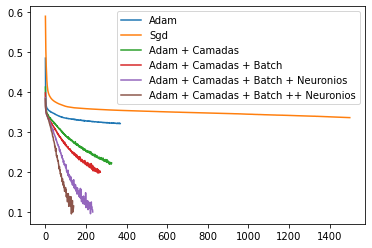

In [24]:
plt.plot(rede_neural_credit1.loss_curve_,label='Adam')
plt.plot(rede_neural_credit2.loss_curve_,label='Sgd')
plt.plot(rede_neural_credit3.loss_curve_,label='Adam + Camadas')
plt.plot(rede_neural_credit4.loss_curve_,label='Adam + Camadas + Batch')
plt.plot(rede_neural_credit5.loss_curve_,label='Adam + Camadas + Batch + Neuronios')
plt.plot(rede_neural_credit6.loss_curve_,label='Adam + Camadas + Batch ++ Neuronios')


plt.legend(loc='upper right')

**Percebemos que quanto mais neurônios adicionamos nas camadas ocultas menor o erro do modelo, porém precisamos comparar todos os modelos e verificar o overfitting e comparar os scores para chegar na melhor conclusão**

# Comparação dos Scores entre os modelos

In [21]:
# Score treino
treino_0 = rede_neural_credit1.score(X_train, y_train)
treino_1 = rede_neural_credit2.score(X_train, y_train)
treino_2 = rede_neural_credit3.score(X_train, y_train)
treino_3 = rede_neural_credit4.score(X_train, y_train)
treino_4 = rede_neural_credit5.score(X_train, y_train)
treino_5 = rede_neural_credit6.score(X_train, y_train)

# Score Teste
teste_0 = rede_neural_credit1.score(X_test,y_test)
teste_1 = rede_neural_credit2.score(X_test,y_test)
teste_2 = rede_neural_credit3.score(X_test,y_test)
teste_3 = rede_neural_credit4.score(X_test,y_test)
teste_4 = rede_neural_credit5.score(X_test,y_test)
teste_5 = rede_neural_credit6.score(X_test,y_test)

#Criar um dataset com os valores dos scores dos modelos com os dados de teste
scores = pd.DataFrame([treino_0,treino_1,treino_2,treino_3,treino_4,treino_5],columns=['Treino'])
scores['Teste'] = pd.DataFrame([teste_0,teste_1,teste_2,teste_3,teste_4,teste_5])

#Nome dos modelos
nomes = ['Modelo1','Modelo2','Modelo3','Modelo4','Modelo5','Modelo6']

scores['Modelos'] = pd.DataFrame(nomes)
scores = scores.set_index('Modelos')
scores



,Treino,Teste
Modelos,,
Modelo1,0.870947,0.858124
Modelo2,0.861618,0.852188
Modelo3,0.909708,0.832635
Modelo4,0.925172,0.832984
Modelo5,0.965430,0.831820
Modelo6,0.962337,0.824837


**O resultado dos modelos mostra que quanto mais neurônios, camadas escondidas são adicionadas, mais os modelos sofrem com overfitting**

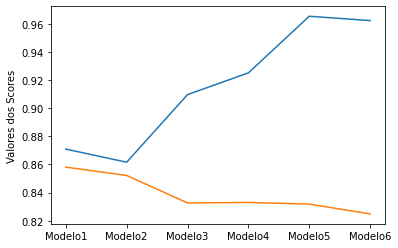

In [25]:
#Plotar os scores dos modelos

plt.plot(scores.Treino);
plt.plot(scores.Teste);
plt.ylabel('Valores dos Scores');

**Observamos que quanto maior o valor na acurácia dos dados de treino menor será nos dados de teste**

# Conclusão:

**Os modelos 5 e 6 foram os que tiveram a melhor acurácia  com os dados de treino, porém quando observamos os dados de teste percebemos que não tem o mesmo desempenho, isso leva a indícios de overfitting**


**Os 2 primeiros modelos foram os que tiveram menor valor na acurácia de treino, porém, são os que tiveram melhor desempenhos nos dados de teste, ficando com valores próximos entre treino e teste, contudo chegamos à conclusão que não basta adicionar camadas, acrescentar neurônios e observar somente os erros do modelo, temos que verificar o desempenho dos dados de teste, para que assim consigamos chegar ao melhor modelo generalizável**